I will only explore the KMeans algorithm for clustering of numerical data. This algorithm starts with 3 random points being assumed the centroids. The SSB and SSW are calculated and points are reassigned to clusters based on the distance. The new centers there on, for every iteration is the centroid of the custers identified and th cluster groups keep getting updated. This process is repeated till we reach a convergence or the maximum number of iterations we specified. Finally we obtain the clusters and the points in those clusters.

## Generating the points

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [57]:
number_of_points = 20000
clustered_points = []
for i in xrange(number_of_points):
    if np.random.random() > 0.5:
        clustered_points.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        clustered_points.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

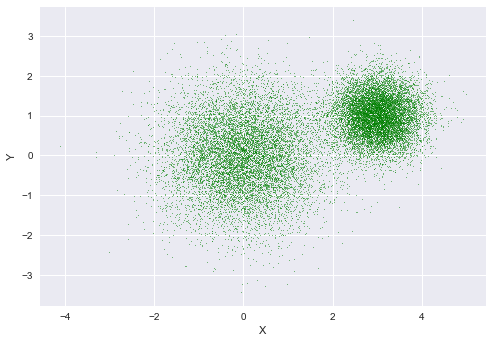

In [58]:
##creating a dataframe of each cluster: valid for only this example because we are
##assuming a balanced dataset.

plt.scatter([v[0] for v in clustered_points], [v[1] for v in clustered_points], 
            s = 0.2, c = "g")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We will now use tensorflow to cluster these points in two clusters as generated by us.

In [59]:
vectors = tf.constant(clustered_points)
k = 2
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [k,-1]))
##random_shuffle will rearrange the elements of the outermost list
##tf.slice extracts slices from the input, starting at begin parameter and goes till size parameter
##So here it will select 0 and 1 points

In [72]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)
                                               ), 
                                      2), #reduce sum across axis 2: ie the distance we just calculated
                        ##uptill here, the reduced sum is stored as a [[distance from 1st cluster],
                        ##                                             [distance from 2nd cluster]]
                        0) # find the index of number with lowest value across axis 0, ie, columns
                        ## each column stores the distance from 2 respective clusters

    # xyz = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)

means = [tf.reduce_mean(tf.gather(vectors, 
                                  tf.reshape(tf.where(tf.equal(assignments, c)),[1, -1])
                                 ), 
                        reduction_indices= [1]) for c in xrange(k)]
init_op = tf.global_variables_initializer()

In [79]:
sess = tf.Session()
sess.run(init_op)
for step in xrange(1000):
    centroid_values, assignment_values = sess.run([centroids, assignments])

In [80]:
data = {"x": [], "y": [], "cluster": []}
for i in xrange(len(assignment_values)):
    data["x"].append(clustered_points[i][0])
    data["y"].append(clustered_points[i][1])
    data["cluster"].append(assignment_values[i])
data = pd.DataFrame(data)

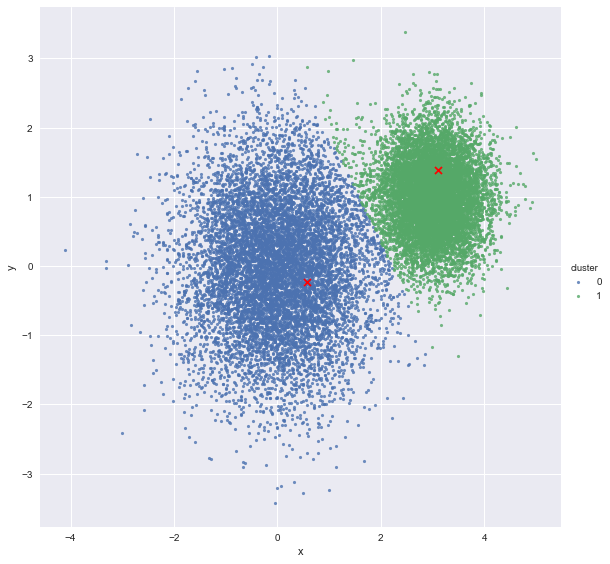

In [94]:
sns.lmplot("x", "y", data = data, hue = "cluster", size = 8, scatter_kws={"s": 10},
           legend = True, fit_reg = False)
plt.scatter([x[0] for x in centroid_values], 
            [y[1] for y in centroid_values], 
            c = "r", marker = "x")
plt.show()

Running 1000 iterations of clustering, we could generate the wo clusters. The red x's denote the cluster centers.